In [1]:
import pandas as pd
import numpy as np
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customers= pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\hashinclude\project\naveen-1\customers.csv')
print(customers.head())
print(customers.dtypes)
print(customers.describe())
print(customers.info)

   customer_id               name  age  gender    income          location
0            1    Lawrence Bryant   40    Male  69022.21        North Eric
1            2      Kathy Pearson   33    Male  50669.60       Parsonsfurt
2            3     Sharon Roberts   58    Male  98330.22        Jaredmouth
3            4  Thomas Johnson II   48  Female  79209.31      South Joanna
4            5     Whitney Bright   40    Male  98595.86  West Cherylmouth
customer_id      int64
name            object
age              int64
gender          object
income         float64
location        object
dtype: object
       customer_id         age        income
count   100.000000  100.000000    100.000000
mean     50.500000   38.220000  66518.818300
std      29.011492   11.664138  20825.837385
min       1.000000   19.000000  30622.060000
25%      25.750000   28.000000  50815.317500
50%      50.500000   39.000000  66662.425000
75%      75.250000   48.000000  85406.492500
max     100.000000   59.000000  99440.

In [3]:
subscriptions= pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\hashinclude\project\naveen-1\subscriptions.csv')
print(subscriptions.head())
print(subscriptions.dtypes)
print(subscriptions.describe())
print(subscriptions.info)

   subscription_id  customer_id  start_date    end_date     status
0                1            1  04-02-2022  11-02-2025  Cancelled
1                5            5  14-01-2023  23-01-2025     Active
2                6            6  29-01-2024  03-06-2025     Active
3                7            7  22-03-2022  10-10-2025  Cancelled
4                8            8  04-04-2024  11-11-2025     Active
subscription_id     int64
customer_id         int64
start_date         object
end_date           object
status             object
dtype: object
       subscription_id  customer_id
count        74.000000    74.000000
mean         53.027027    53.027027
std          27.747873    27.747873
min           1.000000     1.000000
25%          33.500000    33.500000
50%          53.500000    53.500000
75%          75.750000    75.750000
max         100.000000   100.000000
<bound method DataFrame.info of     subscription_id  customer_id  start_date    end_date     status
0                 1           

In [4]:
transactions= pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\hashinclude\project\naveen-1\transactions.csv')
print(transactions.head())
print(transactions.dtypes)
print(transactions.describe())
print(transactions.info)

   transaction_id  customer_id transaction_date  amount transaction_type
0               1           91       18-12-2023   91.13          Payment
1               2           76       15-12-2023  147.70     Cancellation
2               3           84       02-10-2024   70.46     Cancellation
3               4           16       12-06-2024  138.35     Cancellation
4               5           82       06-11-2024  198.42     Cancellation
transaction_id        int64
customer_id           int64
transaction_date     object
amount              float64
transaction_type     object
dtype: object
       transaction_id  customer_id      amount
count      300.000000   300.000000  300.000000
mean       150.500000    51.013333  106.739633
std         86.746758    29.423670   56.110043
min          1.000000     1.000000   12.050000
25%         75.750000    26.750000   56.940000
50%        150.500000    51.500000  104.495000
75%        225.250000    78.000000  158.655000
max        300.000000   100.0000

In [5]:
usage= pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\hashinclude\project\naveen-1\usage.csv')
print(usage.head())
print(usage.dtypes)
print(usage.describe())
print(usage.info)

   usage_id  customer_id feature_used  usage_date  usage_amount
0         1           32    Feature C  23-04-2024          3.22
1         2           33    Feature C  17-04-2024         18.09
2         3           42    Feature B  27-08-2024          1.09
3         4           98    Feature C  28-10-2024          6.67
4         5           96    Feature C  18-11-2024         18.97
usage_id          int64
customer_id       int64
feature_used     object
usage_date       object
usage_amount    float64
dtype: object
         usage_id  customer_id  usage_amount
count  300.000000   300.000000    300.000000
mean   150.500000    49.800000     10.420900
std     86.746758    28.624895      5.464826
min      1.000000     1.000000      1.060000
25%     75.750000    24.000000      5.912500
50%    150.500000    48.000000     10.385000
75%    225.250000    76.250000     15.340000
max    300.000000   100.000000     20.000000
<bound method DataFrame.info of      usage_id  customer_id feature_used  usag

In [6]:
# Step 1: Merge customers and subscriptions on customer_id
customer_subscription_data = pd.merge(customers, subscriptions, on='customer_id', how='left')

# Step 2: Merge the resulting DataFrame with transactions on customer_id
customer_subscription_transaction_data = pd.merge(customer_subscription_data, transactions, on='customer_id', how='left')

# Step 3: Merge the resulting DataFrame with usage on customer_id
combined_data = pd.merge(customer_subscription_transaction_data, usage, on='customer_id', how='left')

# Step 4: Display the combined DataFrame
print("Combined Data:\n", combined_data.head())

# Save the combined data to a new CSV file
combined_data.to_csv('combined_customer_data.csv', index=False)
print("\nCombined data saved as 'combined_customer_data.csv'")


Combined Data:
    customer_id             name  age gender    income    location  \
0            1  Lawrence Bryant   40   Male  69022.21  North Eric   
1            1  Lawrence Bryant   40   Male  69022.21  North Eric   
2            1  Lawrence Bryant   40   Male  69022.21  North Eric   
3            1  Lawrence Bryant   40   Male  69022.21  North Eric   
4            1  Lawrence Bryant   40   Male  69022.21  North Eric   

   subscription_id  start_date    end_date     status  transaction_id  \
0              1.0  04-02-2022  11-02-2025  Cancelled              24   
1              1.0  04-02-2022  11-02-2025  Cancelled              24   
2              1.0  04-02-2022  11-02-2025  Cancelled              24   
3              1.0  04-02-2022  11-02-2025  Cancelled              56   
4              1.0  04-02-2022  11-02-2025  Cancelled              56   

  transaction_date  amount transaction_type  usage_id feature_used  \
0       03-09-2024   69.35          Payment      82.0    Fea

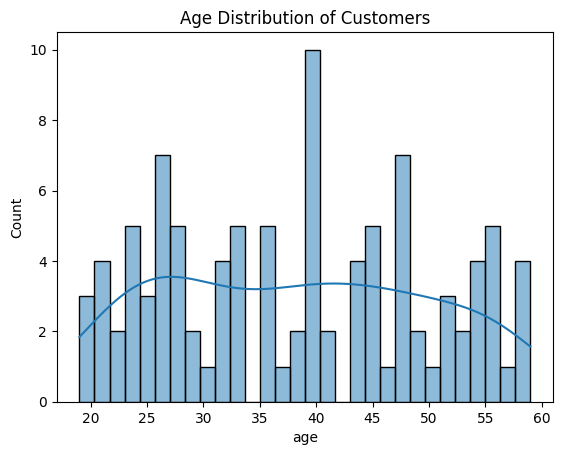

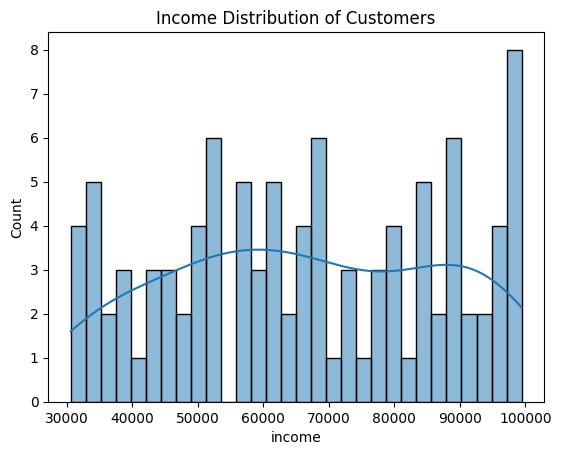

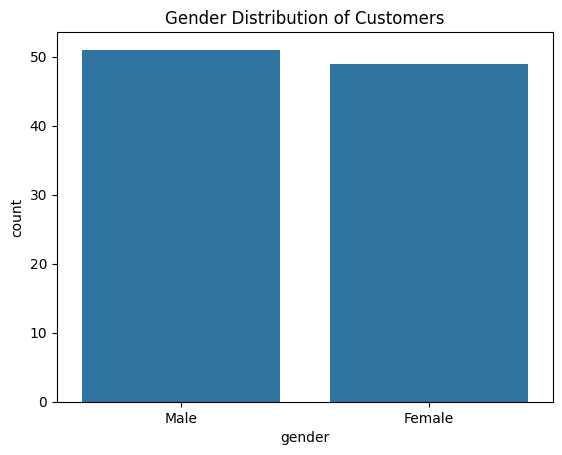

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(customers['age'], kde=True, bins=30)
plt.title('Age Distribution of Customers')
plt.show()

# Income distribution
sns.histplot(customers['income'], kde=True, bins=30)
plt.title('Income Distribution of Customers')
plt.show()

# Gender distribution
sns.countplot(x='gender', data=customers)
plt.title('Gender Distribution of Customers')
plt.show()

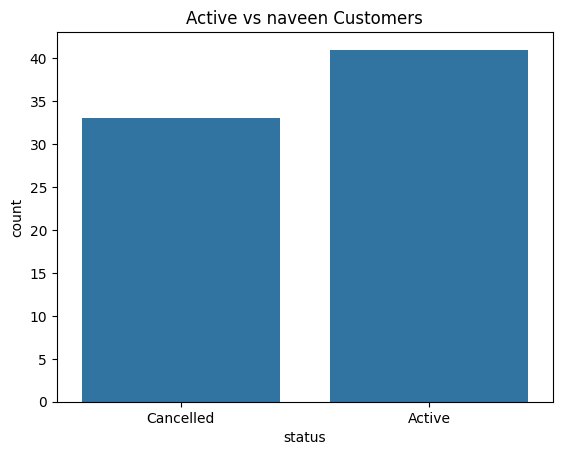

In [8]:
sns.countplot(x='status', data=subscriptions)
plt.title('Active vs naveen Customers')
plt.show()

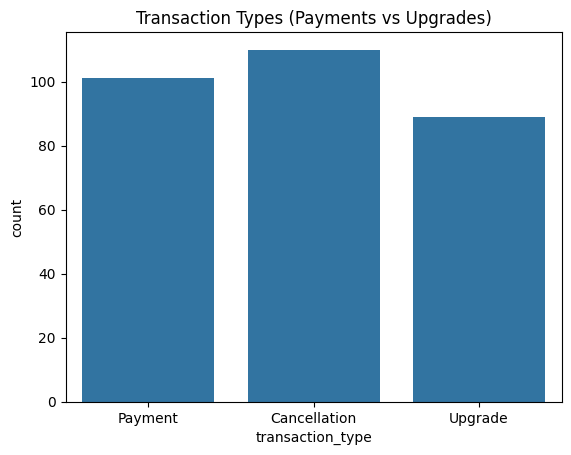

In [9]:
sns.countplot(x='transaction_type', data=transactions)
plt.title('Transaction Types (Payments vs Upgrades)')
plt.show()

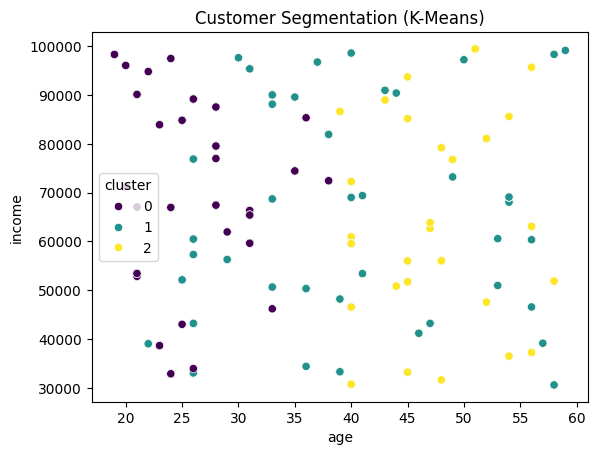

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Merge datasets for clustering
merged_data = pd.merge(customers, transactions, on='customer_id')

# Select features for clustering
X = merged_data[['age', 'income', 'amount']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(x='age', y='income', hue='cluster', data=merged_data, palette='viridis')
plt.title('Customer Segmentation (K-Means)')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Merge customers and subscriptions
Churn_data = pd.merge(customers, subscriptions, on='customer_id')

# Check unique values in 'status' to adjust mapping
print("Unique values in 'status':", Churn_data['status'].unique())

# Correct mapping for actual status values
Churn_data['status'] = Churn_data['status'].map({'Active': 0, 'Cancelled': 1})

# Check for missing values after mapping
print("Missing values in 'status':", Churn_data['status'].isnull().sum())
print("Unique values after encoding:", Churn_data['status'].unique())

# Encode gender
Churn_data['gender'] = Churn_data['gender'].map({'Male': 0, 'Female': 1})

# Features and target
X_churn = Churn_data[['age', 'income', 'gender']]
y_churn = Churn_data['status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique values in 'status': ['Cancelled' 'Active']
Missing values in 'status': 0
Unique values after encoding: [1 0]
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.20      0.17      0.18         6

    accuracy                           0.40        15
   macro avg       0.35      0.36      0.35        15
weighted avg       0.38      0.40      0.39        15



In [12]:
!pip install prophet


c:\Users\navee\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\navee\AppData\Local\Temp\ipykernel_32616\3045127554.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
13:52:32 - cmdstanpy - INFO - Chain [1] start processing
13:52:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\navee\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


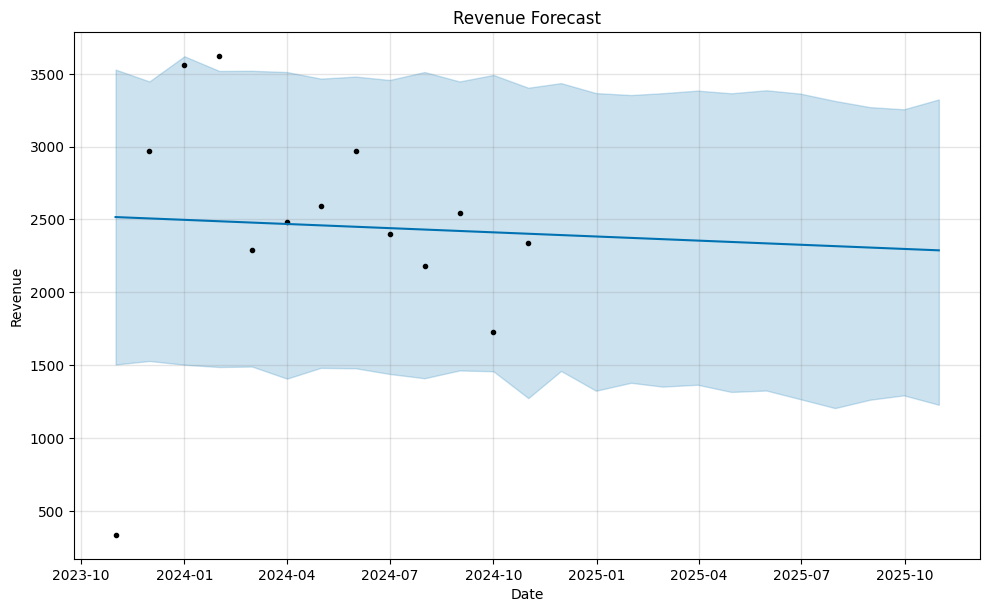

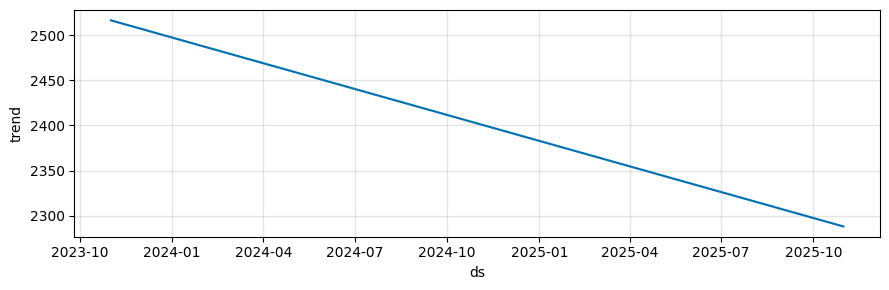

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

#Aggregate revenue by month
monthly_revenue = transactions.groupby(transactions['transaction_date'].dt.to_period('M'))['amount'].sum().reset_index()
monthly_revenue['transaction_date'] = monthly_revenue['transaction_date'].dt.to_timestamp()  # Convert Period to Timestamp
monthly_revenue.columns = ['ds', 'y']  # Prophet expects columns named 'ds' (date) and 'y' (value)

# Initialize and fit Prophet model
model = Prophet()
model.fit(monthly_revenue)

# Create a dataframe for future predictions (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

#  Make predictions
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Optional - View forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()
